In [21]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

apple = Path("Resources//aapl_historical.csv")
algo = Path("Resources//algo_returns.csv")
cost = Path("Resources//cost_historical.csv")
google = Path("Resources//goog_historical.csv")
sp = Path("Resources//sp500_history.csv")
whale = Path("Resources//whale_returns.csv")

apple_df = pd.read_csv(apple, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo, index_col="Date", infer_datetime_format=True, parse_dates=True)
cost_df = pd.read_csv(cost, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_df = pd.read_csv(google, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
sp_df = pd.read_csv(sp, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df = pd.read_csv(whale, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_df.dropna(inplace=True)
whale_df.dropna(inplace=True)
sp_df['SP 500'] = sp_df['Close'].str.replace('$','')
sp_df['SP 500'] = sp_df['SP 500'].astype('float64')
sp_df.drop(columns=['Close'], inplace = True)
sp500_df = sp_df.sort_index().pct_change()


In [25]:
sp500_df.dropna(inplace = True)
sp500_df.head()

,SP 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [26]:
combined = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


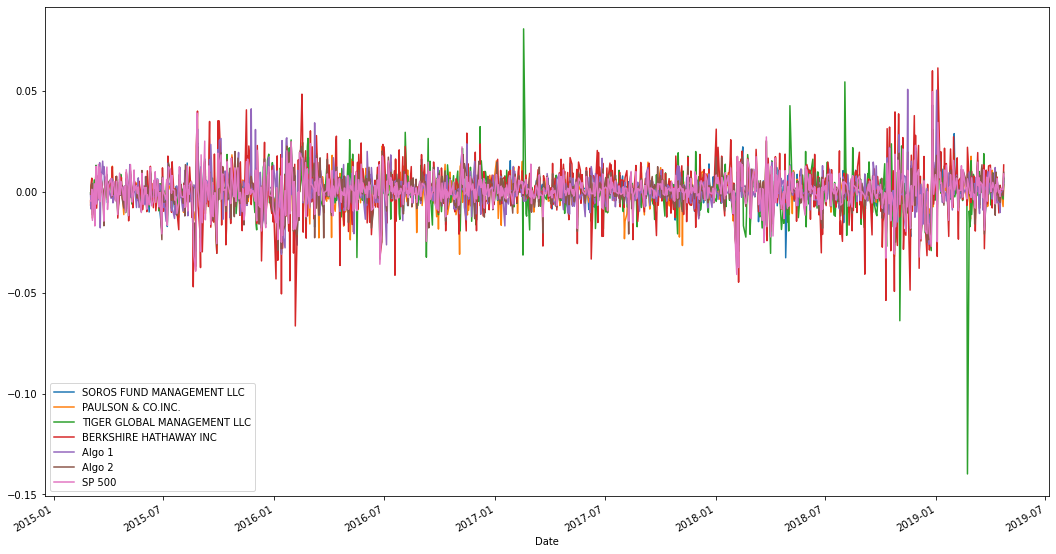

In [27]:
combined.plot(figsize=(18,10))

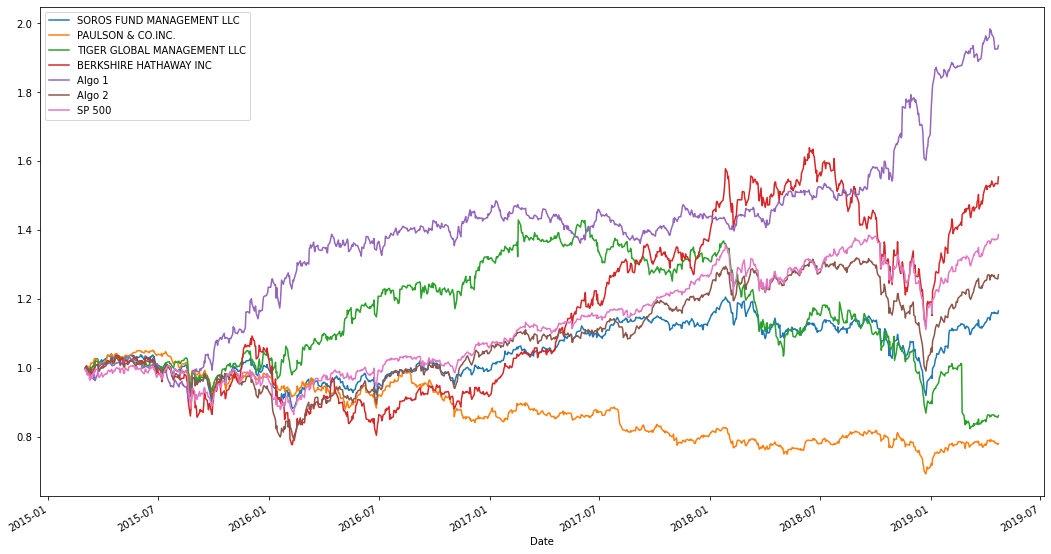

In [29]:
cumulative_returns = (1 + combined).cumprod()
cumulative_returns.plot(figsize=(18,10))

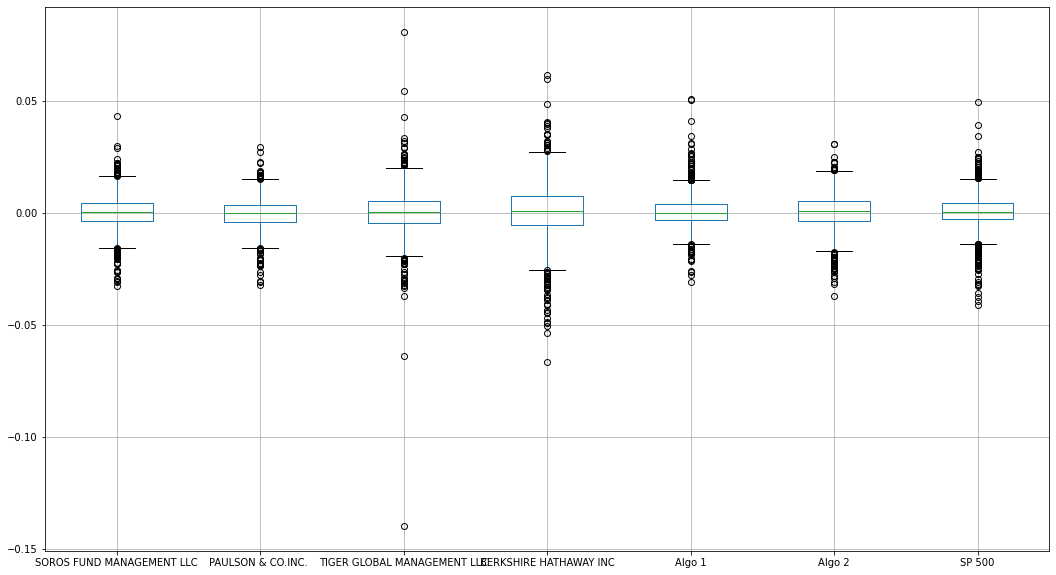

In [46]:
#Risk
#1
boxplot = combined.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','SP 500'], figsize =(18,10))

In [47]:
combined.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP 500                         0.008554
dtype: float64

In [48]:
combined.std() > 0.008554

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP 500                         False
dtype: bool

In [49]:
#annualized standard devviation
volatility = combined.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP 500                         0.135786
dtype: float64

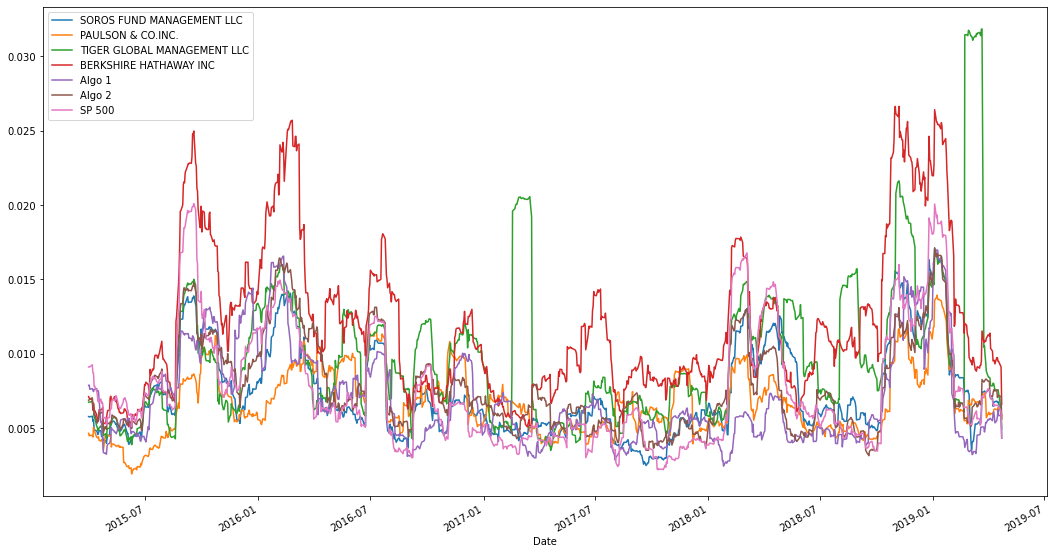

In [51]:
combined.rolling(window=21).std().plot(figsize = (18,10))

In [53]:
correlation = combined.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


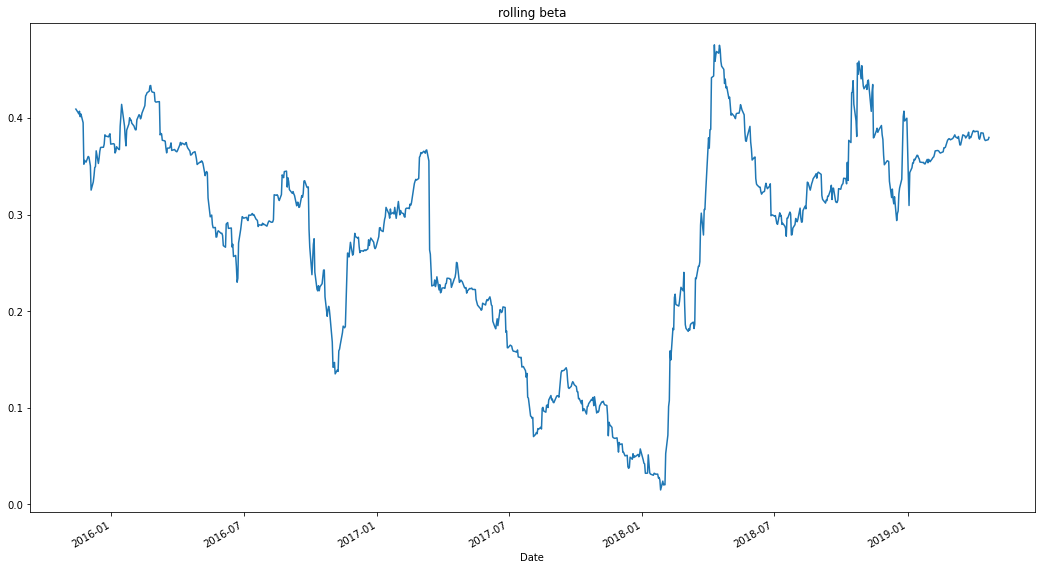

In [60]:
covariance = combined['Algo 1'].rolling(window=180).cov(combined['SP 500'])
variance = combined['Algo 1'].rolling(window=180).var()
Algo1_beta = covariance / variance
Algo1_beta.plot(figsize = (18,10), title = "rolling beta")

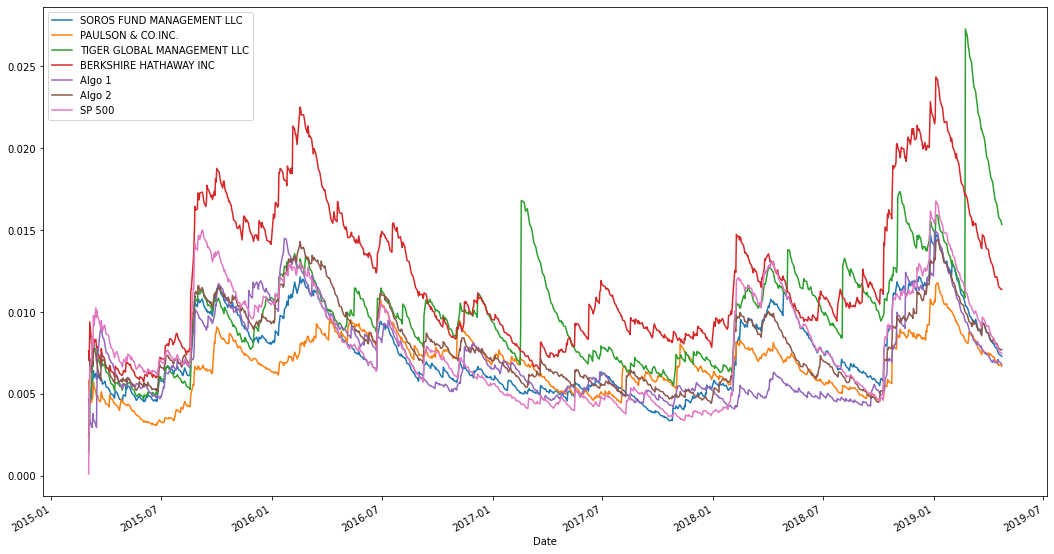

In [86]:
exp_21=combined.ewm(halflife=21).std()
exp_21.plot(figsize=(18,10))


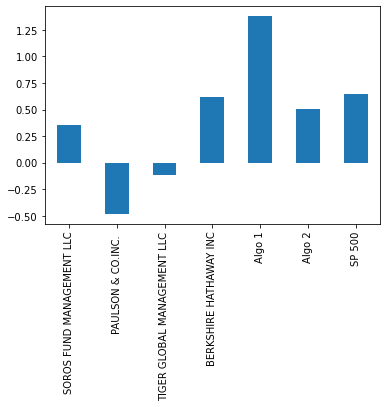

In [91]:
#sharpe
sharpe_ratios = (combined.mean() * 252) / (combined.std() * np.sqrt(252))
sharpe_ratios.plot.bar()